In [1]:
import numpy as np
import pandas as pd
import os
import glob

In [2]:
# 1. 경로 설정
data_folder = 'wildPPG'

# 2. 파일 리스트 생성 (user_1.csv 부터 user_16.csv)
# 1부터 16까지의 번호를 사용합니다.
file_numbers = [1, 2, 3, "4_part1", "4_part2", 5, "6_part1", "6_part2", 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
file_list = [f'user_{i}.csv' for i in file_numbers]

# 3. 데이터프레임 저장 (동적 변수 생성)
print(f"📁 {data_folder} 폴더에서 파일 불러오기 시작...")

for i in file_numbers:
    filename = f'user_{i}.csv'
    # 전체 파일 경로 생성
    filepath = os.path.join(data_folder, filename)
    
    if os.path.exists(filepath):
        try:
            # CSV 파일 읽기
            df = pd.read_csv(filepath)
            df.columns = ['index', 'PPG', 'temperature']
            
            # 동적으로 변수 이름 생성 및 저장 (예: df_1, df_2, ...)
            variable_name = f'df_{i}'
            globals()[variable_name] = df
            
            print(f"  ✅ {filename} 파일 ({len(df)} 행)을 **{variable_name}** 변수에 저장했습니다.")
        
        except Exception as e:
            print(f"  ❌ 오류: {filename} 파일 읽기 실패. 오류: {e}")
    else:
        print(f"  ⚠️ 경고: {filepath} 파일이 존재하지 않아 건너뜁니다.")

print("---")
print("✅ 모든 파일 불러오기 및 개별 변수 저장 완료!")

📁 wildPPG 폴더에서 파일 불러오기 시작...
  ✅ user_1.csv 파일 (5679104 행)을 **df_1** 변수에 저장했습니다.
  ✅ user_2.csv 파일 (5690368 행)을 **df_2** 변수에 저장했습니다.
  ✅ user_3.csv 파일 (6162432 행)을 **df_3** 변수에 저장했습니다.
  ✅ user_4_part1.csv 파일 (3786928 행)을 **df_4_part1** 변수에 저장했습니다.
  ✅ user_4_part2.csv 파일 (2823685 행)을 **df_4_part2** 변수에 저장했습니다.
  ✅ user_5.csv 파일 (6169600 행)을 **df_5** 변수에 저장했습니다.
  ✅ user_6_part1.csv 파일 (4337569 행)을 **df_6_part1** 변수에 저장했습니다.
  ✅ user_6_part2.csv 파일 (1592312 행)을 **df_6_part2** 변수에 저장했습니다.
  ✅ user_7.csv 파일 (6103040 행)을 **df_7** 변수에 저장했습니다.
  ✅ user_8.csv 파일 (6768640 행)을 **df_8** 변수에 저장했습니다.
  ✅ user_9.csv 파일 (6664192 행)을 **df_9** 변수에 저장했습니다.
  ✅ user_10.csv 파일 (5762048 행)을 **df_10** 변수에 저장했습니다.
  ✅ user_11.csv 파일 (6066176 행)을 **df_11** 변수에 저장했습니다.
  ✅ user_12.csv 파일 (5835776 행)을 **df_12** 변수에 저장했습니다.
  ✅ user_13.csv 파일 (6633472 행)을 **df_13** 변수에 저장했습니다.
  ✅ user_14.csv 파일 (6691840 행)을 **df_14** 변수에 저장했습니다.
  ✅ user_15.csv 파일 (6107136 행)을 **df_15** 변수에 저장했습니다.
  ✅ user_16.csv 파일 (6405120

- 일단 확인용으로 df4, df6를 한 df로도 만들어 놓기

In [3]:
df_4 = pd.concat([df_4_part1, df_4_part2], ignore_index=True)
df_6 = pd.concat([df_6_part1, df_6_part2], ignore_index=True)

In [4]:
df_4.tail()

,index,PPG,temperature
6610608,7018491,0.800919,31.570336
6610609,7018492,0.800842,31.570336
6610610,7018493,0.801046,31.570336
6610611,7018494,0.800911,31.570336
6610612,7018495,0.801056,31.570336


In [5]:
df_4.shape, df_6.shape

((6610613, 3), (5929881, 3))

- 결측치 확인

In [6]:
df_variable_names = [f'df_{i}' for i in file_numbers]

print("--- 결측치 확인 ---")

found_missing = False
missing_summary = {}

for var_name in df_variable_names:
    
    # 전역 변수 목록(globals())에 해당 이름의 데이터프레임이 존재하는지 확인
    if var_name in globals():
        df = globals()[var_name]
        
        # 결측치 개수를 열(Column)별로 계산
        missing_counts = df.isnull().sum()
        
        # 해당 데이터프레임의 모든 결측치 총합
        total_missing = missing_counts.sum()
        
        if total_missing > 0:
            found_missing = True
            missing_summary[var_name] = total_missing
            print(f"❌ **{var_name}** ({len(df):,} 행): **총 결측치 {total_missing:,}개 발견!**")
            # 결측치가 있는 열만 출력
            print(missing_counts[missing_counts > 0])
            print("-" * 30)
        else:
            # 출력 메시지가 너무 길어지지 않도록, 결측치가 없을 경우 짧게 출력
            print(f"✅ {var_name} ({len(df):,} 행): 결측치 X.")
    else:
        print(f"⚠️ 경고: {var_name} 변수가 전역 스코프에 존재하지 않아 건너뜁니다.")

print("\n--- 최종 결측치 확인 결과 ---")
if found_missing:
    print(f"**결측치가 발견된 데이터프레임 목록:** {list(missing_summary.keys())}")
else:
    print("**모든 데이터프레임에서 결측치가 발견 X.**")

--- 결측치 확인 ---
✅ df_1 (5,679,104 행): 결측치 X.
✅ df_2 (5,690,368 행): 결측치 X.
✅ df_3 (6,162,432 행): 결측치 X.
✅ df_4_part1 (3,786,928 행): 결측치 X.
✅ df_4_part2 (2,823,685 행): 결측치 X.
✅ df_5 (6,169,600 행): 결측치 X.
✅ df_6_part1 (4,337,569 행): 결측치 X.
✅ df_6_part2 (1,592,312 행): 결측치 X.
✅ df_7 (6,103,040 행): 결측치 X.
✅ df_8 (6,768,640 행): 결측치 X.
✅ df_9 (6,664,192 행): 결측치 X.
✅ df_10 (5,762,048 행): 결측치 X.
✅ df_11 (6,066,176 행): 결측치 X.
✅ df_12 (5,835,776 행): 결측치 X.
✅ df_13 (6,633,472 행): 결측치 X.
✅ df_14 (6,691,840 행): 결측치 X.
✅ df_15 (6,107,136 행): 결측치 X.
✅ df_16 (6,405,120 행): 결측치 X.

--- 최종 결측치 확인 결과 ---
**모든 데이터프레임에서 결측치가 발견 X.**


- describe 확인

In [7]:
df_variable_names

['df_1',
 'df_2',
 'df_3',
 'df_4_part1',
 'df_4_part2',
 'df_5',
 'df_6_part1',
 'df_6_part2',
 'df_7',
 'df_8',
 'df_9',
 'df_10',
 'df_11',
 'df_12',
 'df_13',
 'df_14',
 'df_15',
 'df_16']

In [8]:
pd.set_option('display.max_rows', 100)

for var_name in df_variable_names:
    if var_name in globals():
        df = globals()[var_name]
        print(f"--- {var_name} mean ---")
        print("PPG:", df["PPG"].mean(), "Temp:", df["temperature"].mean())
        print("\n")

--- df_1 mean ---
PPG: 0.8007960246390344 Temp: 30.530211621385764


--- df_2 mean ---
PPG: 0.6856175898703002 Temp: 32.06590200145266


--- df_3 mean ---
PPG: 0.6164653929735111 Temp: 31.581324749037325


--- df_4_part1 mean ---
PPG: 0.604155437726988 Temp: 29.399957697638065


--- df_4_part2 mean ---
PPG: 0.7233227751523801 Temp: 32.60834403398065


--- df_5 mean ---
PPG: 0.4281283408994258 Temp: 32.278756218306704


--- df_6_part1 mean ---
PPG: 0.7358278978745035 Temp: 30.598209511636007


--- df_6_part2 mean ---
PPG: 0.7374108769560497 Temp: 31.410274700613225


--- df_7 mean ---
PPG: 0.6376138572248589 Temp: 28.45947975581633


--- df_8 mean ---
PPG: 0.48999590696382667 Temp: 32.04003999024899


--- df_9 mean ---
PPG: 0.43585280845077906 Temp: 30.972769826662454


--- df_10 mean ---
PPG: 0.7289202699555799 Temp: 31.23009446550461


--- df_11 mean ---
PPG: 0.4482343538372188 Temp: 31.072890123102386


--- df_12 mean ---
PPG: 0.6509451884737136 Temp: 29.876324402324848


--- df_13 m

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

file_numbers = [1, 2, 3, "4_part1", "4_part2", 5, "6_part1", "6_part2", 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
df_variable_names = [f'df_{i}' for i in file_numbers]

ppg_means = []
temp_means = []
user_labels = []


for var_name in df_variable_names:
    if var_name in globals():
        df = globals()[var_name]
        
        if 'index' in df.columns:
            df = df.drop(columns=['index'])
            
        mean_ppg = df['PPG'].mean()
        ppg_means.append(mean_ppg)

        mean_temp = df['temperature'].mean()
        temp_means.append(mean_temp)

        user_labels.append(var_name) # 'df_1', 'df_4_part1' 같은 레이블 사용

        print(f"  {var_name}: PPG 평균 = {mean_ppg:.6f}")
        print(f"  {var_name}: Temperature 평균 = {mean_temp:.6f}")
    else:
        print(f"  ⚠️ 경고: {var_name} 변수가 없어 건너뜁니다.")

# 시각화를 위한 데이터프레임 생성
df_means = pd.DataFrame({
    'DataFrame': user_labels,
    'PPG_Mean': ppg_means,
    'temp_Mean' : temp_means
})

print("\n✅ PPG 평균 계산 완료.")
print(df_means.head()) # 결과 확인

  df_1: PPG 평균 = 0.800796
  df_1: Temperature 평균 = 30.530212
  df_2: PPG 평균 = 0.685618
  df_2: Temperature 평균 = 32.065902
  df_3: PPG 평균 = 0.616465
  df_3: Temperature 평균 = 31.581325
  df_4_part1: PPG 평균 = 0.604155
  df_4_part1: Temperature 평균 = 29.399958
  df_4_part2: PPG 평균 = 0.723323
  df_4_part2: Temperature 평균 = 32.608344
  df_5: PPG 평균 = 0.428128
  df_5: Temperature 평균 = 32.278756
  df_6_part1: PPG 평균 = 0.735828
  df_6_part1: Temperature 평균 = 30.598210
  df_6_part2: PPG 평균 = 0.737411
  df_6_part2: Temperature 평균 = 31.410275
  df_7: PPG 평균 = 0.637614
  df_7: Temperature 평균 = 28.459480
  df_8: PPG 평균 = 0.489996
  df_8: Temperature 평균 = 32.040040
  df_9: PPG 평균 = 0.435853
  df_9: Temperature 평균 = 30.972770
  df_10: PPG 평균 = 0.728920
  df_10: Temperature 평균 = 31.230094
  df_11: PPG 평균 = 0.448234
  df_11: Temperature 평균 = 31.072890
  df_12: PPG 평균 = 0.650945
  df_12: Temperature 평균 = 29.876324
  df_13: PPG 평균 = 0.386937
  df_13: Temperature 평균 = 31.368590
  df_14: PPG 평균 = 0.650383
  

/tmp/ipykernel_354826/3115446441.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


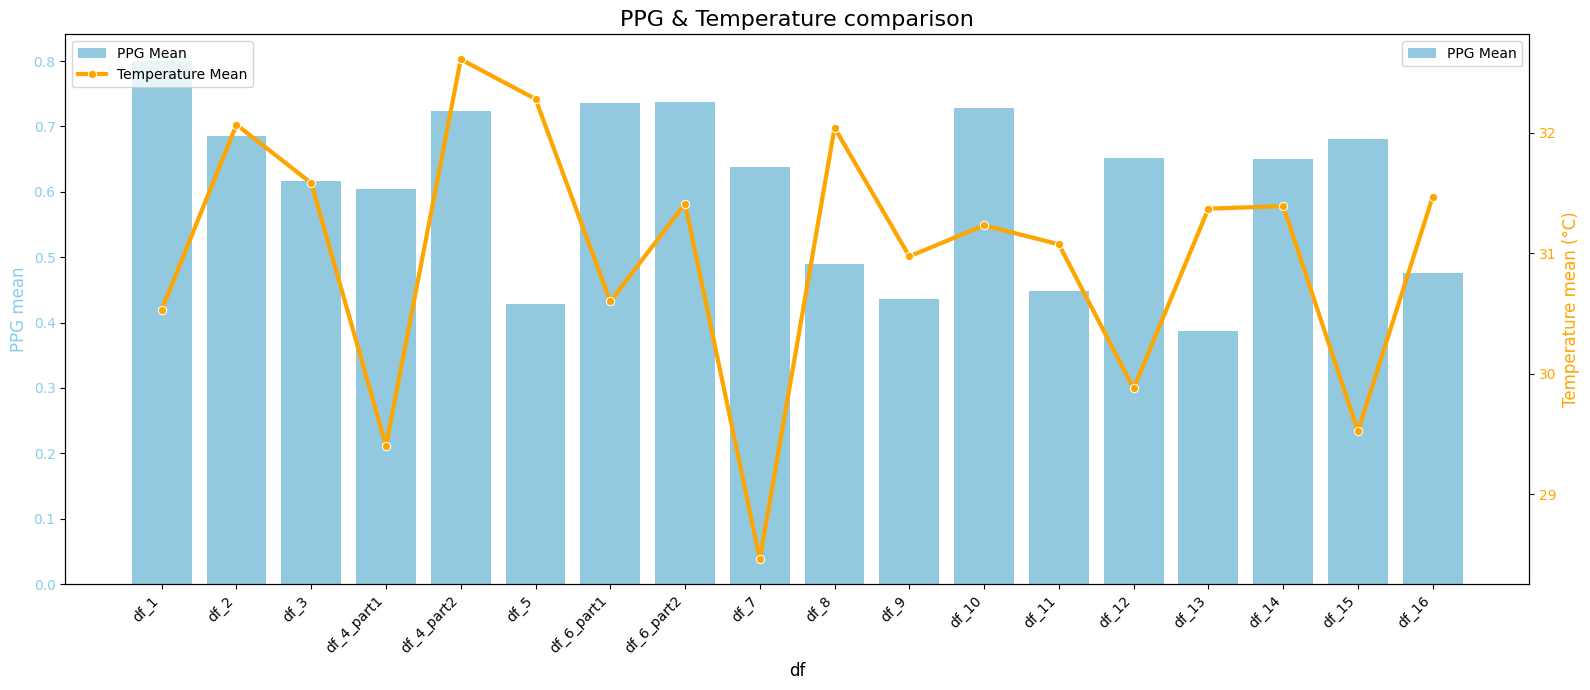

In [10]:
plt.figure(figsize=(16, 7))

# 1. 첫 번째 Y축 (왼쪽): PPG 평균
ax1 = plt.gca() # 현재 축(Axes) 객체를 가져옴
sns.barplot(x='DataFrame', y='PPG_Mean', data=df_means, color='skyblue', ax=ax1, label='PPG Mean')

ax1.set_title('PPG & Temperature comparison', fontsize=16)
ax1.set_xlabel('df', fontsize=12)
ax1.set_ylabel('PPG mean', fontsize=12, color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue') # Y축 레이블 색상 설정

# 2. 두 번째 Y축 (오른쪽): Temperature 평균
ax2 = ax1.twinx() # x축을 공유하는 새로운 Y축을 생성
sns.lineplot(x='DataFrame', y='temp_Mean', data=df_means, color='orange', ax=ax2, marker='o', linewidth=3, label='Temperature Mean')
# Temperature는 변화량이 PPG보다 작을 수 있어 막대 대신 선 그래프로 표현하는 것이 일반적입니다.
# 만약 막대 그래프로 원하시면 lineplot 대신 barplot을 사용해도 되나, 겹쳐 보일 수 있습니다.

ax2.set_ylabel('Temperature mean (°C)', fontsize=12, color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# X축 레이블 회전 및 정렬
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# 범례(Legend) 추가
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.tight_layout()
plt.show()